In [1]:
import pickle
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append("/Users/lesrene/Desktop/DS4300/practical-01-pavi_lesrene_zainab/indexer")

from indexer.abstract_index import AbstractIndex
from indexer.trees.avl_tree import AVLTreeIndex
from indexer.trees.bst_index import BinarySearchTreeIndex
from indexer.maps.hash_map import HashMapIndex
from indexer.arrays.array import SortedArrayIndex

In [3]:
with open("/Users/lesrene/BST.pkl", "rb") as f:  
    BST = pickle.load(f) 
    f.close()
    
with open("/Users/lesrene/AVL.pkl", "rb") as f:  
    AVL = pickle.load(f) 
    f.close()
    
with open("/Users/lesrene/Hash.pkl", "rb") as f:  
    HASH = pickle.load(f) 
    f.close()
    
with open("/Users/lesrene/Array.pkl", "rb") as f:  
    ARR = pickle.load(f) 
    f.close()

### Data Characteristics

In [4]:
keys_HASH = HASH.get_keys_in_order()

In [5]:
word_counts = Counter(keys_HASH)
most_common = word_counts.most_common(10)

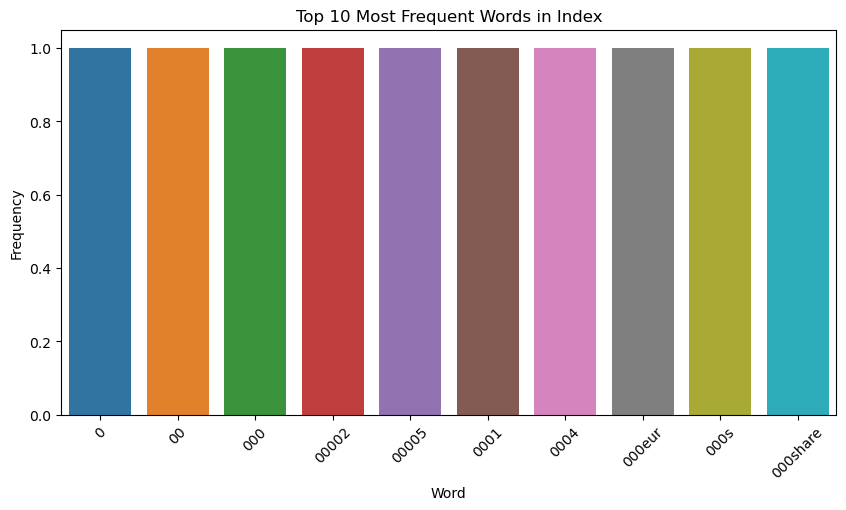

In [6]:
plt.figure(figsize=(10, 5))
sns.barplot(x=[word[0] for word in most_common], y=[word[1] for word in most_common])
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.title("Top 10 Most Frequent Words in Index")
plt.xticks(rotation=45)
plt.show()

In [8]:
avg_numdocs, valuels_lengths = HASH.get_avg_value_list_len()

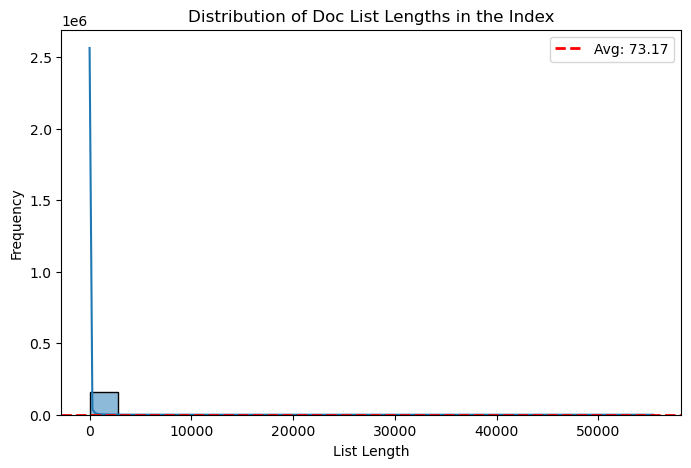

In [11]:
plt.figure(figsize=(8,5))
sns.histplot(valuels_lengths, bins=20, kde=True)
plt.axhline(avg_numdocs, color='red', linestyle='dashed', linewidth=2, label=f'Avg: {avg_numdocs:.2f}')  # add line for avg
plt.xlabel("List Length")
plt.ylabel("Frequency")
plt.title("Distribution of Doc List Lengths in the Index")
plt.legend()  # shows a legend for the avg line
plt.show()

### Index Structures & Index Efficiency

Providing evidence that supports the assertion that each index is properly constructed.

In [12]:
depths_BST = BST.get_node_depths()
frequency_depths = list(Counter(depths_BST).values())

ValueError: x and y must be the same size

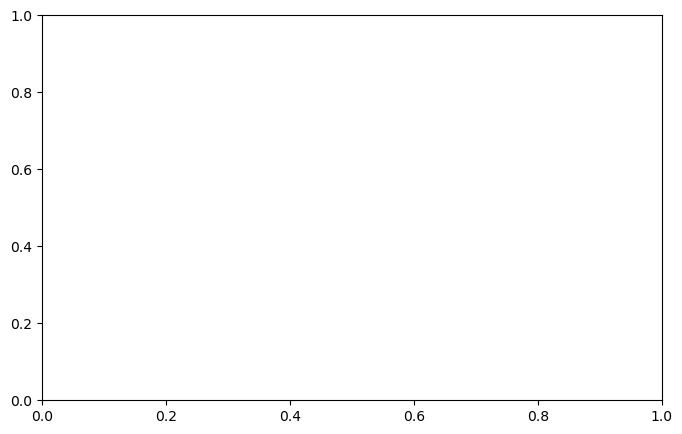

In [13]:
plt.figure(figsize=(8, 5))
plt.scatter(depths_BST, frequency_depths, color='blue')
plt.xlabel("Depth Level")
plt.ylabel("Number of Nodes")
plt.title("Node Depth vs. Number of Nodes")
plt.grid()
plt.show()

In [14]:
AVL_bfs, keys_AVL = AVL.get_balance_factors()

TypeError: get_balance_factors() missing 2 required positional arguments: 'current' and 'result'

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(keys, balance_factors_values, color='blue')
plt.axhline(y=2, color='r', linestyle='--', label='Upper Threshold (+2)')
plt.axhline(y=-2, color='r', linestyle='--', label='Lower Threshold (-2)')
plt.xlabel("Node Key")
plt.ylabel("Node's Balance Factor")
plt.title("Balance Factors of Our AVL Tree Nodes")
plt.legend()
plt.show()

In [ ]:
    def get_balance_factors(self, current: Optional[AVLNode], result: List[Tuple[Any, int]]) -> None:
        
        balance_factors = [] 

        if current is None:
            return
    
        self._inorder_traversal(current.left, result)
        balance_factor = self._height(current.left) - self._height(current.right)
        balance_factors.append((current.key, balance_factor))
        self._inorder_traversal(current.right, result)
        return balance_factors, self.get_keys_in_order()
        